In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std



In [2]:
true_coef=np.array([14.3,1.39,0.12,0.39])
true_std_err=np.array([1.3,0.17,0.03,0.05])

df = pd.read_csv("logveri.csv" ) 

df1=df[['Lgamma','Ecl','Bstar','Edot']]

df1.head




<bound method NDFrame.head of         Lgamma       Ecl      Bstar       Edot
0    34.959041  0.431364  12.041393  35.176091
1    35.000000  0.696356  13.146128  35.653213
2    33.491362  0.413300   8.342423  34.079181
3    32.880814  0.383815   8.477121  33.531479
4    33.643453  0.563481   8.079181  34.380211
..         ...       ...        ...        ...
185  33.623249  0.514548   8.322219  34.531479
186  33.544068  0.481443   8.556303  33.579784
187  33.204120  0.320146   8.176091  34.041393
188  32.322219 -0.259637   8.079181  33.342423
189  33.623249  0.604226   8.414973  34.342423

[190 rows x 4 columns]>

In [3]:
Ecl=np.array(df1['Ecl']).reshape(-1,1)
Bstar=np.array(df1['Bstar']).reshape(-1,1)
Epsilon_dot=np.array(df1['Edot']).reshape(-1,1)
Y=np.array(df1['Lgamma']).reshape(-1,1)
Y


array([[34.95904139],
       [35.        ],
       [33.49136169],
       [32.88081359],
       [33.64345268],
       [33.20411998],
       [33.98227123],
       [34.34242268],
       [34.89762709],
       [34.75587486],
       [32.89762709],
       [34.14612804],
       [32.90308999],
       [32.64345268],
       [33.77085201],
       [33.69897   ],
       [31.71600334],
       [32.79239169],
       [33.80617997],
       [35.8573325 ],
       [36.89762709],
       [31.5563025 ],
       [33.96378783],
       [33.44715803],
       [33.73239376],
       [33.11394335],
       [34.60205999],
       [34.20411998],
       [34.32221929],
       [34.25527251],
       [32.41497335],
       [33.71600334],
       [32.65321251],
       [33.86332286],
       [33.17609126],
       [34.93951925],
       [33.41497335],
       [33.38021124],
       [32.47712125],
       [33.94448267],
       [33.64345268],
       [34.92427929],
       [35.59106461],
       [34.88081359],
       [32.88649073],
       [34

In [4]:
X=np.column_stack((Ecl,Bstar,Epsilon_dot))
X = sm.add_constant(X)
X

array([[ 1.00000000e+00,  4.31363764e-01,  1.20413927e+01,
         3.51760913e+01],
       [ 1.00000000e+00,  6.96356389e-01,  1.31461280e+01,
         3.56532125e+01],
       [ 1.00000000e+00,  4.13299764e-01,  8.34242268e+00,
         3.40791812e+01],
       [ 1.00000000e+00,  3.83815366e-01,  8.47712125e+00,
         3.35314789e+01],
       [ 1.00000000e+00,  5.63481085e-01,  8.07918125e+00,
         3.43802112e+01],
       [ 1.00000000e+00,  4.03120521e-01,  8.11394335e+00,
         3.39242793e+01],
       [ 1.00000000e+00,  6.34477270e-01,  8.39794001e+00,
         3.42552725e+01],
       [ 1.00000000e+00,  4.59392488e-01,  1.13979400e+01,
         3.44623980e+01],
       [ 1.00000000e+00,  8.89861721e-01,  1.26812412e+01,
         3.74313638e+01],
       [ 1.00000000e+00,  6.78518379e-01,  8.75587486e+00,
         3.53802112e+01],
       [ 1.00000000e+00,  2.04119983e-01,  8.44715803e+00,
         3.45797836e+01],
       [ 1.00000000e+00,  2.43038049e-01,  1.26720979e+01,
      

In [5]:
# OLS modelini oluştur ve fit et
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     186.9
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           6.87e-56
Time:                        14:08:12   Log-Likelihood:                -128.33
No. Observations:                 190   AIC:                             264.7
Df Residuals:                     186   BIC:                             277.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.4100      1.514     12.159      0.0

In [6]:
obtained_coef=results.params
obtained_std_err=results.bse

print("Katsayılar (coef): ", obtained_coef)
print("Standart Hatalar (std err):", obtained_std_err)

Katsayılar (coef):  [18.41001444  1.38102933  0.11773179  0.39276812]
Standart Hatalar (std err): [1.51414189 0.17267969 0.02525162 0.04982865]


In [13]:
mse_coef = np.mean((obtained_coef - true_coef) ** 2)

print("Katsayılar için Ortalama Kare Hata (MSE):", mse_coef)

mse_std_err = np.mean((obtained_std_err - true_std_err) ** 2)

print("Ortalama Kare Hata (MSE):", mse_std_err)

Katsayılar için Ortalama Kare Hata (MSE): 4.223077988405748
Ortalama Kare Hata (MSE): 0.011471626663612206


In [15]:
#Comparison of the manually obtained R^2 and Adj. R^2 values ​​with the results obtained from the model

R_squared = results.rsquared
adj_R_squared = results.rsquared_adj

In [17]:
y_pred = (results.fittedvalues).reshape(-1,1)
y_mean=np.mean(Y)
RSS=np.sum((Y-y_pred)**2)
TSS=np.sum((Y-y_mean)**2)


In [19]:
R_squared_manual = 1 - (RSS / TSS)

n = len(Y)  # number of observation
k = X.shape[1] - 1  # number of coefficients (exceptconstant)

adj_R_squared_manual = 1 - (1 - R_squared) * (n - 1) / (n - k - 1)


In [21]:
print(" R-Squared (R²):",R_squared)
print(" Adjusted R-Squared (Adj. R²):",adj_R_squared)

 R-kare (R²): 0.7509176701593926
 Düzeltilmiş R-kare (Adj. R²): 0.7469002132264796


In [23]:
if np.isclose(R_squared, R_squared_manual, atol=1e-5):
    print("R² values are matching.")
else:
    print("R² values are not matching.")

if np.isclose(adj_R_squared, adj_R_squared_manual, atol=1e-5):
    print("Adjusted R²  values are matching.")
else:
    print("Adjusted R²  values are not matching.")

R² değerleri eşleşiyor.
Düzeltilmiş R² değerleri eşleşiyor.


In [30]:
#Plotting histograms of coefficients and determining the 95 upper, 95 lower and average values

def calculate_statistics(data):
    median = np.median(data)
    lower_95 = np.percentile(data, 5.0)   
    upper_95 = np.percentile(data, 95.0)  
    return median, lower_95, upper_95


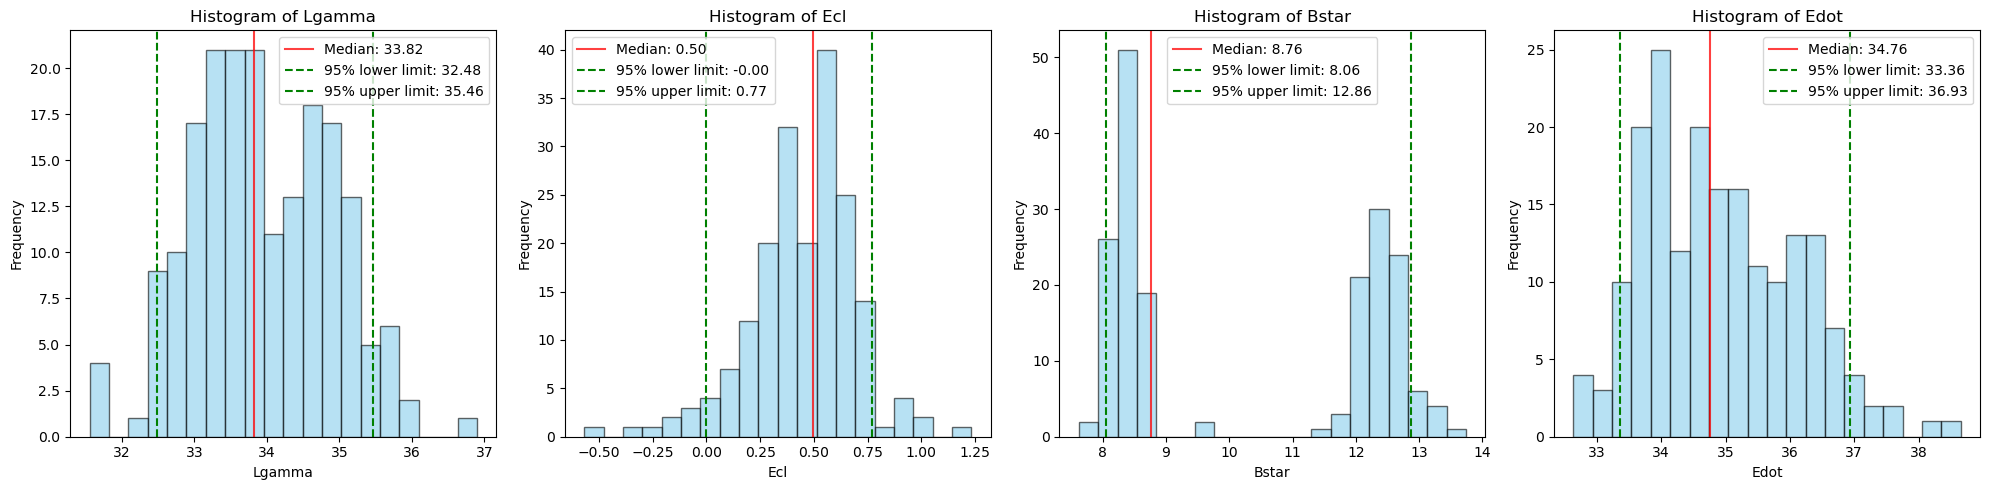

In [32]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, col in enumerate(df1):
    data = df1[col].dropna()  
    median, lower_95, upper_95 = calculate_statistics(data)
    
    # Histogram
    axs[i].hist(data,alpha=0.6,bins=20, color='skyblue', edgecolor='black')
    axs[i].axvline(median,alpha=0.75 ,color='red', linestyle='-', label=f'Median: {median:.2f}')
    axs[i].axvline(lower_95, color='green', linestyle='--', label=f'95% lower limit: {lower_95:.2f}')
    axs[i].axvline(upper_95, color='green', linestyle='--', label=f'95% upper limit: {upper_95:.2f}')
    
   
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].legend()


plt.tight_layout()
plt.show()

In [34]:
# %68 (1-sigma)  calculationconfidence interval calculation
pred_summary = results.get_prediction(X).summary_frame(alpha=0.32)

pred_summary


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,34.239442,0.049150,34.190434,34.288451,33.757796,34.721088
1,34.922865,0.079626,34.843468,35.002263,34.437185,35.408545
2,33.348178,0.048246,33.300071,33.396285,32.866623,33.829733
3,33.108197,0.055128,33.053228,33.163167,32.625908,33.590486
4,33.642826,0.054558,33.588425,33.697227,33.160601,34.125050
...,...,...,...,...,...,...
185,33.663274,0.050897,33.612523,33.714025,33.181447,34.145100
186,33.271318,0.059282,33.212207,33.330429,32.788539,33.754097
187,33.185105,0.053401,33.131858,33.238353,32.703010,33.667201
188,32.098465,0.115765,31.983032,32.213897,31.605610,32.591319


In [36]:
ci_lower = pred_summary['mean_ci_lower'].values
ci_upper = pred_summary['mean_ci_upper'].values

mean = pred_summary['mean'].values

pi_lower = pred_summary['obs_ci_lower'].values
pi_upper = pred_summary['obs_ci_upper'].values


In [38]:
sorted_indices = np.argsort(y_pred.flatten())
Y_sorted=Y[sorted_indices]
Y_sorted = Y[sorted_indices]
y_pred_sorted = y_pred[sorted_indices].flatten()  # To make the y_pred one-dimensional
ci_lower_sorted = ci_lower[sorted_indices]
ci_upper_sorted = ci_upper[sorted_indices]
pi_lower_sorted = pi_lower[sorted_indices]
pi_upper_sorted = pi_upper[sorted_indices]


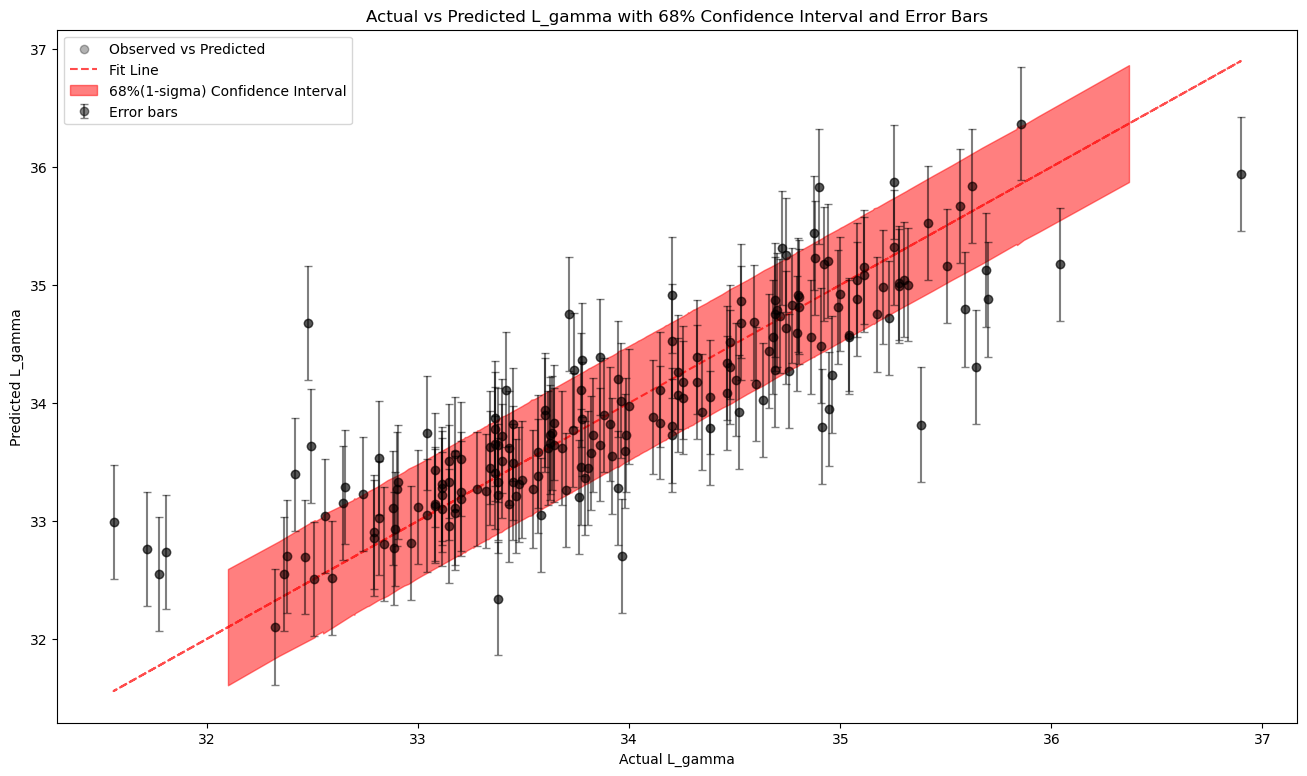

In [42]:
plt.figure(figsize=(16, 9))

plt.scatter(Y.flatten(), y_pred.flatten(), color='black', alpha=0.3, label='Observed vs Predicted')
plt.plot(Y, Y, color='red', linestyle='--', alpha=0.7, label='Fit Line')

error = ((pi_upper_sorted - pi_lower_sorted) / 2).flatten()
# Error bars plotting
plt.errorbar(Y.flatten(), y_pred.flatten(), yerr=error, fmt='o', color='black', alpha=0.5, label='Error bars', capsize=3)

# Confidence interval plotting
plt.fill_between(y_pred_sorted, pi_lower_sorted, pi_upper_sorted,
                 color='red', alpha=0.5, label='68%(1-sigma) Confidence Interval')

plt.title('Actual vs Predicted L_gamma with 68% Confidence Interval and Error Bars')
plt.xlabel('Actual L_gamma')
plt.ylabel('Predicted L_gamma')
plt.legend()

plt.show()

In [124]:
residuals = (Y - y_pred).flatten()

residuals_median = np.median(residuals)
residuals_std = np.std(residuals)


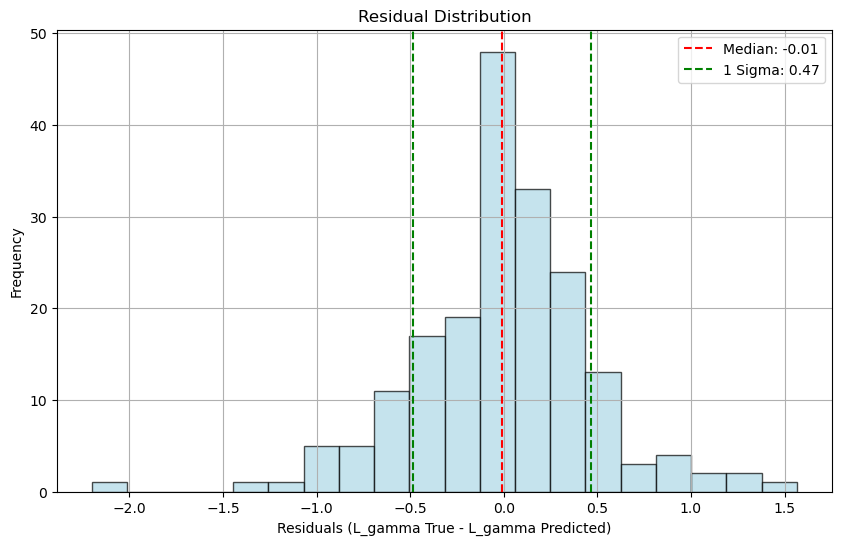

Median of Residuals: -0.01
Standard Deviation of Residuals: 0.48


In [126]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='lightblue', edgecolor='black', alpha=0.7)
plt.axvline(residuals_median, color='red', linestyle='--', label=f'Median: {residuals_median:.2f}')
plt.axvline(residuals_median + residuals_std, color='green', linestyle='--', label=f'1 Sigma: {residuals_median + residuals_std:.2f}')
plt.axvline(residuals_median - residuals_std, color='green', linestyle='--')

# labeling
plt.title('Residual Distribution')
plt.xlabel('Residuals (L_gamma True - L_gamma Predicted)')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

# Plotting histogrom of Residual Distribution
print(f'Median of Residuals: {residuals_median:.2f}')
print(f'Standard Deviation of Residuals: {residuals_std:.2f}')